# <span style='color:#FE774C'>Marine Regions </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analyses
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull the Marine Regions data, and run visualizations using functions
### The second part shows how to **COMBINE** the Marine Regions with the World Ocean Database queries

In [1]:
import odp.geospatial as odp
import warnings
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
db=odp.Database()
db_plt= odp.PlotTools()
gd=odp.GridData()

#### The following shows the available datasets that can be used as dataframes. To see gridded datasets, run *gd.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer Catalog](https://app.oceandata.earth/catalog)

In [3]:
db.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Database Casts,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of the casts of the World Ocean Databa...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
World Ocean Database Measurements,"[NOAA, NCEI]",The World Ocean Database (WOD) is world's larg...,Dataset of measurements taken from all the cas...,https://www.ncei.noaa.gov/products/world-ocean...,"Boyer, T.P., O.K. Baranova, C. Coleman, H.E. G...",global ocean variables,"[temperature, salinity, oxygen, nutrients, pre...",temperature ...
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None
Ocean Biodiversity Information System,[OBIS],Most comprehensive gateway to the world’s ocea...,None,https://obis.org/,OBIS (YEAR) Ocean Biodiversity Information Sys...,global ocean biodiversity,"[biodiversity, species, taxa, ocean]",None
World Register of Marine Species,[WoRMS],Authoritative and comprehensive list of names ...,None,https://www.marinespecies.org/index.php,WoRMS Editorial Board (2022). World Register o...,authoritative list of marine species,"[marine species, biodiversity, register]",None


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [4]:
df_db = db.datasets
df_db[['boundaries' in x for x in df_db['tags']]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
Marine Regions - IHO Sea Areas,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,None,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region]",None
Marine Regions - Intersect EEZ IHO Sea,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The intersect of the Exclusive Economic Zones ...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, iho sea, region, eez]",None
Marine Regions - World EEZ,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,Maritime Boundaries and Exclusive Economic Zon...,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world, region, eez]",None
Marine Regions - World Marine Heritage Sites,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,World Marine Heritage Sites version 1,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, world marine heritage sites, reg...",None
Marine Regions - EEZ Land Union,[Flanders Marine Institute],Marine Regions tries to establish for the firs...,The union of world country boundaries and EEZ's,https://www.marineregions.org/,Flanders Marine Institute (2019). Maritime Bou...,"marine georeferenced place names, locations, b...","[boundaries, region, eez]",None


#### <span style='color:#3464eb'>You can also access citation information etc.

In [5]:
db.datasets.loc['Marine Regions - World EEZ'].citation

'Flanders Marine Institute (2019). Maritime Boundaries Geodatabase: Maritime Boundaries and Exclusive Economic Zones (200NM), version 11'

In [6]:
db.datasets.loc['Marine Regions - World EEZ'].database_description

'Marine Regions tries to establish for the first time a standardized list of georeferenced marine place names and marine areas. This dataset shows Maritime Boundaries and Exclusive Economic Zones (200NM)'

## Part 1: Pulling data - <span style='color:#FE774C'> **Marine regions** data  </span>


#### Insert the name of the table you are interested in into the query function
In this case we are interseted in the Marine Regions - Intersect EEZ IHO Sea <br>
This returns a [geopandas](https://geopandas.org/en/stable/docs.html) dataframe with a geometry column<br>
There are many built-in functions you can use with these geopandas dataframes

In [7]:
df_eez = db.query('Marine Regions - Intersect EEZ IHO Sea', 
                  limit=5)
df_eez.head(3)

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,UN_TER1,MRGID_SOV1,SOVEREIGN1,ISO_SOV1,UN_SOV1,MRGID_TER2,TERRITORY2,ISO_TER2,UN_TER2,MRGID_SOV2,SOVEREIGN2,ISO_SOV2,UN_SOV2,MRGID_TER3,TERRITORY3,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,1.0,25614,Albanian part of the Adriatic Sea,3314,Adriatic Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,8,2153,Albania,ALB,8,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,12127,19.11030,40.93096,"POLYGON ((19.98580 39.74337, 19.95859 39.74320..."
1,2.0,25622,Albanian part of the Ionian Sea,3351,Ionian Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,8,2153,Albania,ALB,8,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,39,19.97118,39.69394,"POLYGON ((20.00835 39.69182, 20.00810 39.69187..."
2,3.0,25603,Algerian part of the Alboran Sea,3324,Alboran Sea,8378,Algerian Exclusive Economic Zone,2152,Algeria,DZA,12,2152,Algeria,DZA,12,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,7045,-1.74716,35.58150,"POLYGON ((-1.18826 35.57788, -1.18973 35.57580..."


### We can also add <span style='color:#9D59F4'> filters </span> to the data pull

You can filter for a specific value in a column, or a specific geographical area

In [8]:
filter1 = db.filter_data('SOVEREIGN1', '=', 'Norway')
df_norway = db.query('Marine Regions - Intersect EEZ IHO Sea', 
                     filters=[filter1],
                     limit = 5)
df_norway.head(3)

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,UN_TER1,MRGID_SOV1,SOVEREIGN1,ISO_SOV1,UN_SOV1,MRGID_TER2,TERRITORY2,ISO_TER2,UN_TER2,MRGID_SOV2,SOVEREIGN2,ISO_SOV2,UN_SOV2,MRGID_TER3,TERRITORY3,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,258.0,25236,Jan Mayen part of the Greenland Sea,2356,Greenland Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,744,2252,Norway,NOR,578,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,121220,-7.56373,72.18359,"POLYGON ((-8.08625 71.14481, -8.11043 71.14313..."
1,259.0,25241,Jan Mayen part of the Norwegian Sea,2353,Norwegian Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,744,2252,Norway,NOR,578,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,171687,-3.46641,70.28880,"POLYGON ((2.35622 71.17424, 2.35184 71.15638, ..."
2,289.0,49666,Joint regime area Sweden - Norway part of the ...,2379,Skagerrak,48977,Joint regime area Sweden / Norway,2252,Norway,NOR,578,2252,Norway,NOR,578,2180,Sweden,SWE,752,2180,Sweden,SWE,752,0,None,None,0,0,None,None,0,140,10.50095,58.80998,"POLYGON ((10.59444 58.76147, 10.26814 58.77569..."


Greenland Sea


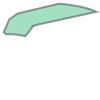

In [9]:
poly = df_norway.iloc[0]['geometry']
print(df_norway.iloc[0]['IHO_SEA'])
poly

### Let's play around more with the Marine Regions - IHO Sea Areas table

In [14]:
df_mr = db.query('Marine Regions - IHO Sea Areas', 
                 limit=40)
df_mr.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry
0,Rio de La Plata,33,-56.842478,-35.113338,-59.765656,-36.358856,-54.943024,-31.523437,31797,4325,"POLYGON ((-54.94302 -34.94791, -54.97875 -34.9..."
1,Bass Strait,62A,146.424291,-39.450520,143.532508,-41.440274,149.909468,-37.460793,112699,4366,"POLYGON ((149.90464 -37.54325, 149.90500 -37.5..."
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8..."
3,Tasman Sea,63,160.710798,-39.701056,146.872615,-50.866916,175.286985,-30.000000,3344624,4365,"POLYGON ((159.03333 -30.00000, 159.03983 -30.0..."
4,Mozambique Channel,45A,40.877244,-19.304095,32.430623,-26.842402,49.241982,-10.498872,1394283,4261,"POLYGON ((43.38218 -11.37021, 43.42691 -11.374..."


## Plotting polygons - <span style='color:#FE774C'> **Marine regions** data  </span>
#### We have a built-in function that allows you to plot polygons

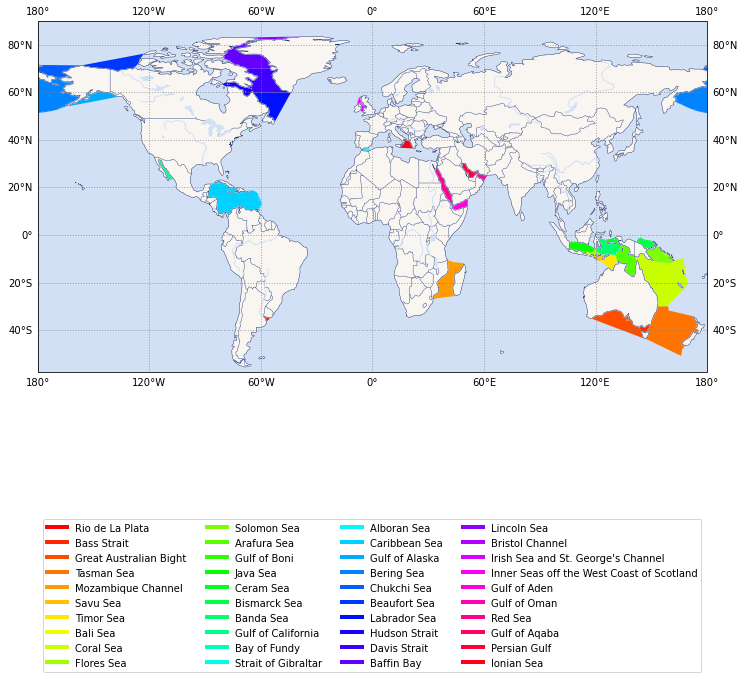

In [6]:
db_plt.plot_polygons(df_mr, 
                     col='NAME')

## Part 2: Using a <span style='color:#FE774C'> **polygon** </span> from Marie Regions to pull data from  <span style='color:#FE774C'> **WOD** </span>

First, determine your polygon. Here we are using a polygon belonging to Portugal (the Azores) from our our Marine Regions dataset

In [13]:
filter1 = db.filter_data('SOVEREIGN1', '=', 'Portugal')

df_portugal = db.query('Marine Regions - Intersect EEZ IHO Sea', 
                       filters=[filter1])
df_portugal

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,UN_TER1,MRGID_SOV1,SOVEREIGN1,ISO_SOV1,UN_SOV1,MRGID_TER2,TERRITORY2,ISO_TER2,UN_TER2,MRGID_SOV2,SOVEREIGN2,ISO_SOV2,UN_SOV2,MRGID_TER3,TERRITORY3,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,427.0,25318,Portuguese (Azores) part of the North Atlantic...,1912,North Atlantic Ocean,8361,Portuguese Exclusive Economic Zone (Azores),2454,Azores,None,0,2243,Portugal,PRT,620,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,960421,-27.97601,38.47538,"POLYGON ((-28.49345 42.41897, -28.49153 42.417..."
1,428.0,25320,Portuguese (Madeira) part of the North Atlanti...,1912,North Atlantic Ocean,8363,Portuguese Exclusive Economic Zone (Madeira),4956,Madeira,None,0,2243,Portugal,PRT,620,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,452796,-16.81091,33.17302,"POLYGON ((-12.73690 33.23778, -12.80701 32.994..."
2,429.0,25368,Portuguese part of the North Atlantic Ocean,1912,North Atlantic Ocean,5688,Portuguese Exclusive Economic Zone,2243,Portugal,PRT,620,2243,Portugal,PRT,620,0,None,None,0,0,None,None,0,0,None,None,0,0,None,None,0,315501,-10.92284,38.31921,"POLYGON ((-8.60255 42.05275, -8.62158 42.05028..."


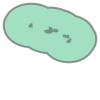

In [14]:
poly = df_portugal['geometry'][0]
poly

#### Then pass in the polygon along with the dataset and table you are interested in within a timeframe - here we pick the WOD measurements table

In [25]:
df_poly = db.query('World Ocean Database Casts',
                   date_from='2019-06-01',
                   date_to='2019-9-30',
                   poly = poly)

df_poly.head(5)

,cast_id,timestamp,geometry,year,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,exploration_tool,observation_count
0,19431378,2019-06-12 06:59:59.999,POINT (-32.27800 37.28900),2019,FRANCE,4835,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,FR016857,POURQUOI PAS? (Call Sign FMCY),None,None,xbt,653
1,19431560,2019-06-18 07:34:00.000,POINT (-32.27800 37.26700),2019,FRANCE,5042,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,FR016857,POURQUOI PAS? (Call Sign FMCY),None,None,xbt,660
2,19431859,2019-06-28 08:12:00.000,POINT (-32.28300 37.29200),2019,FRANCE,5571,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,FR016857,POURQUOI PAS? (Call Sign FMCY),None,None,xbt,629
3,19548238,2019-07-17 19:10:59.995,POINT (-34.06300 37.15400),2019,GERMANY,6323,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,DE012759,CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 200...,None,None,xbt,1441
4,19548240,2019-07-17 20:54:00.000,POINT (-33.38000 37.19900),2019,GERMANY,6325,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,DE012759,CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 200...,None,None,xbt,1548


#### Plot the casts using the plot functions

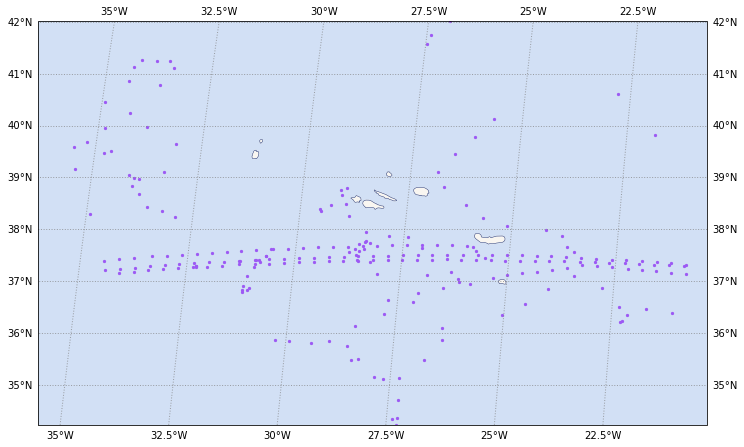

In [26]:
db_plt.plot_points(df_poly)

#### We can also create an interactive plot (will show only when cell is run)

In [24]:
db_plt.plot(df_poly)

{"initialViewState": {"latitude": 0, "longitude": 0, "zoom": 1}, "layers": [{"@@type": "PointCloudLayer", "autoHighlight": true, "data": [{"cast_id": 19431378, "country": "FRANCE", "exploration_tool": "xbt", "geometry": {"coordinates": [-32.27799987792969, 37.28900146484375], "type": "Point"}, "institute": null, "latitude": 37.28900146484375, "longitude": -32.27799987792969, "observation_count": 653, "platform": "POURQUOI PAS? (Call Sign FMCY)", "project": null, "time": "2019-06-12 06:59:59", "timestamp": {}, "wod_cast_index": 4835, "wod_cruise_identifier": "FR016857", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19431560, "country": "FRANCE", "exploration_tool": "xbt", "geometry": {"coordinates": [-32.27799987792969, 37.266998291015625], "type": "Point"}, "institute": null, "latitude": 37.266998291015625, "longitude": -32.27799987792969, "observation_count": 660, "platform": "POURQUOI PAS? (Call Sign FMCY)", "project": null, "time": "2019-06-18 07:34:00", "timestamp": {}, "wod_cast_index": 5042, "wod_cruise_identifier": "FR016857", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19431859, "country": "FRANCE", "exploration_tool": "xbt", "geometry": {"coordinates": [-32.28300094604492, 37.29199981689453], "type": "Point"}, "institute": null, "latitude": 37.29199981689453, "longitude": -32.28300094604492, "observation_count": 629, "platform": "POURQUOI PAS? (Call Sign FMCY)", "project": null, "time": "2019-06-28 08:12:00", "timestamp": {}, "wod_cast_index": 5571, "wod_cruise_identifier": "FR016857", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19548238, "country": "GERMANY", "exploration_tool": "xbt", "geometry": {"coordinates": [-34.0629997253418, 37.15399932861328], "type": "Point"}, "institute": null, "latitude": 37.15399932861328, "longitude": -34.0629997253418, "observation_count": 1441, "platform": "CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 2006;IMO9295268)\\0", "project": null, "time": "2019-07-17 19:10:59", "timestamp": {}, "wod_cast_index": 6323, "wod_cruise_identifier": "DE012759", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19548240, "country": "GERMANY", "exploration_tool": "xbt", "geometry": {"coordinates": [-33.380001068115234, 37.19900131225586], "type": "Point"}, "institute": null, "latitude": 37.19900131225586, "longitude": -33.380001068115234, "observation_count": 1548, "platform": "CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 2006;IMO9295268)\\0", "project": null, "time": "2019-07-17 20:54:00", "timestamp": {}, "wod_cast_index": 6325, "wod_cruise_identifier": "DE012759", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19548241, "country": "GERMANY", "exploration_tool": "xbt", "geometry": {"coordinates": [-33.72100067138672, 37.178001403808594], "type": "Point"}, "institute": null, "latitude": 37.178001403808594, "longitude": -33.72100067138672, "observation_count": 1431, "platform": "CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 2006;IMO9295268)\\0", "project": null, "time": "2019-07-17 20:02:59", "timestamp": {}, "wod_cast_index": 6326, "wod_cruise_identifier": "DE012759", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/Aug2021/2019/wod_xbt_2019.nc", "year": 2019}, {"cast_id": 19548243, "country": "GERMANY", "exploration_tool": "xbt", "geometry": {"coordinates": [-33.03900146484375, 37.22100067138672], "type": "Point"}, "institute": null, "latitude": 37.22100067138672, "longitude": -33.03900146484375, "observation_count": 1446, "platform": "CHICAGO EXPRESS (Cont.ship;c.s.DCUJ2;built 2006;IMO9295268)\\0", "project": null, "time": "2019-07-17 21:46:00", "timestamp": {

## Using <span style='color:#200A3A'> GEOPANDAS </span> to combine datasets - <span style='color:#FE774C'> **Marine regions** </span> and <span style='color:#FE774C'> **WOD Casts** </span>

#### First pull cast data using query function by passing in name of WOD table and date range

In [21]:
df_casts = db.query('World Ocean Database Casts',
                    date_from = '2015-01-01',
                    date_to = '2016-01-01', 
                    limit=1000)
df_casts.head(3)

,cast_id,timestamp,geometry,year,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,exploration_tool,observation_count
0,16642974,2015-01-01,POINT (8.51472 42.40516),2015,ITALY,18,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,IT001835,None,None,None,pfl,77
1,16632610,2015-01-01,POINT (88.81000 12.07000),2015,UNITED STATES,92,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US029666,FIXED PLATFORM,None,RESEARCH MOORED ARRAY FOR AFRIC.-ASIAN-AUSTRAL...,mrb,13
2,16632612,2015-01-01,POINT (80.41000 -11.94000),2015,UNKNOWN,91,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,99010047,FIXED PLATFORM,None,RESEARCH MOORED ARRAY FOR AFRIC.-ASIAN-AUSTRAL...,mrb,11


#### Then use a geopandas function to join the two tables. 
#### You can select how and the operation

In [22]:
df_mr_casts = gpd.sjoin(df_mr, df_casts, how='inner', op='intersects')
df_mr_casts.head(3)

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry,index_right,cast_id,timestamp,year,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,exploration_tool,observation_count
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",128,16642985,2015-01-01 01:07:30.000,2015,AUSTRALIA,25,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,AU005887,None,None,ARGO AUSTRALIA,pfl,996
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",748,16643337,2015-01-01 21:59:02.756,2015,UNITED STATES,389,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US029676,None,None,U.S. ARGO PROJECT,pfl,30
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",814,16643413,2015-01-01 23:45:57.243,2015,AUSTRALIA,456,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,AU005827,None,None,ARGO AUSTRALIA,pfl,997
